#CP4

**Análise Exploratória - Locação de Imóveis no Brasil**

Nesta prova, você terá a oportunidade de realizar uma análise exploratória detalhada de um dataset que contém informações sobre locação de imóveis em diversas cidades do Brasil. Seu objetivo será explorar a estrutura dos dados, identificar padrões e, principalmente, remover possíveis outliers que possam afetar a integridade da análise.

Utilize técnicas de visualização, estatísticas descritivas e o conhecimento adquirido ao longo do curso para realizar essa análise e fornecer insights valiosos sobre o mercado imobiliário.

Boa sorte!

**Descrição Geral:** <br/>

O dataset casas_brasil.csv contém 10.692 registros e 13 colunas. Ele inclui informações sobre a cidade, tamanho do imóvel (área), número de quartos, banheiros, vagas de estacionamento, além de dados financeiros como o valor do aluguel, taxa de condomínio (HOA), imposto sobre a propriedade e seguro contra incêndios. A seguir estão as principais colunas e suas descrições:

- city: Cidade onde o imóvel está localizado.
- area: Tamanho do imóvel em metros quadrados.
- rooms: Número de quartos.
- bathroom: Número de banheiros.
- parking_spaces: Número de vagas de estacionamento.
- floor: Andar em que o imóvel está localizado.
- animal: Aceitação ou não de animais de estimação (ex.: "acept", "not acept").
- furniture: Informação sobre mobília do imóvel (ex.: "furnished", "not furnished").
- hoa: Valor da taxa de condomínio (em reais).
- rent_amount: Valor do aluguel (em reais).
- property_tax: Valor do imposto sobre a propriedade (em reais).
- fire_insurance: Valor do seguro contra incêndios (em reais).
- total: Valor total a ser pago, incluindo aluguel, condomínio, impostos e seguro.

## Análise de Estrutura - *(Peso: 3)*

1 - Faça o import do pandas

In [1]:
import pandas as pd

2 - Crie um novo dataframe com o .csv casas_brasil.csv e apresente os 5 primeiros e em outro bloco de código os 5 últimos registros

In [4]:
df = pd.read_csv('casas_brasil.csv')

In [5]:
df.head(5)

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


3 - Existem variáveis faltantes? <br/>
***Responda aqui***

In [6]:
df.isnull().sum()

,0
city,0
area,0
rooms,0
bathroom,0
parking_spaces,0
floor,0
animal,0
furniture,0
hoa,0
rent_amount,0


4 - Cite exemplo de variáveis qualitativas (Rótulos ou de Classificação) em nosso dataset.

In [7]:
#furniture, city, animal

5 - Cite exemplo de variáveis quantitativas (Valores inteiros ou pontos flutuantes) em nosso dataset.

In [8]:
#area, rooms, bathroom, ret_amount

6 - Utilize uma função embutida do pandas para apresentar o número de casas que temos no dataframe para as top 5 cidades em quantidade?

In [9]:
df['city'].value_counts().head(5)

,count
city,
São Paulo,5887
Rio de Janeiro,1501
Belo Horizonte,1258
Porto Alegre,1193
Campinas,853


7 - Aproveitando a função acima, apresente as top 5 cidades em porcentagem.

In [10]:
df['city'].value_counts(normalize=True).head(5)

,proportion
city,
São Paulo,0.550599
Rio de Janeiro,0.140385
Belo Horizonte,0.117658
Porto Alegre,0.111579
Campinas,0.079779


8 - Crie um novo DataFrame chamado casas_rj_bh selecionando somente os registros onde a cidade é Rio de Janeiro OU Belo Horizonte.

In [11]:
df_rj_bh = df[(df['city'] == 'Rio de Janeiro') | (df['city'] == 'Belo Horizonte')]

df_rj_bh.head()

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955
17,Rio de Janeiro,88,2,3,1,9,not acept,furnished,1614,3500,221,16,5351
18,Rio de Janeiro,56,2,1,0,8,acept,not furnished,800,1220,0,16,2036
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368


## Tratamento de Outliers - *(Peso: 4)*

9 - Utilizando o dataset principal (primeiro dataframe que você criou, não o casas_rj_bh), análise a média da base e o desvio padrão (std) da nossa variável total. Os valores estão muito distantes?

R: ***Responda aqui***

In [12]:
df['total'].mean()

5490.4869996258885

In [13]:
df['total'].std()

16484.72591235027

10 - Utilizando o dataset principal (primeiro dataframe que você criou, não o casas_rj_bh), crie um histograma com o agrupamento de 50 bins para avaliarmos a distribuição da nossa variável total.

<Axes: >

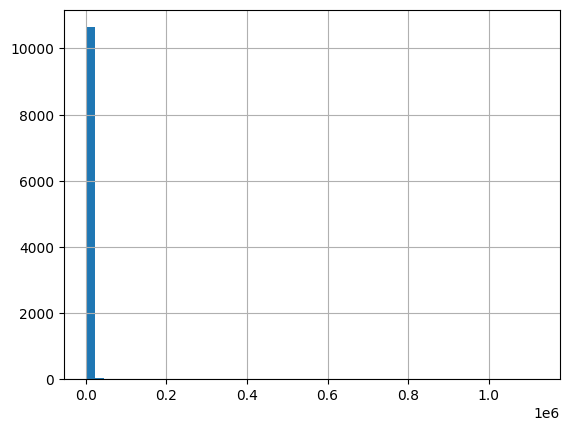

In [14]:
df['total'].hist(bins=50)

11 - Utilizando o dataset principal (primeiro dataframe que você criou, não o casas_rj_bh), crie um boxplot para avaliarmos nossas métricas estatísticas.

<Axes: >

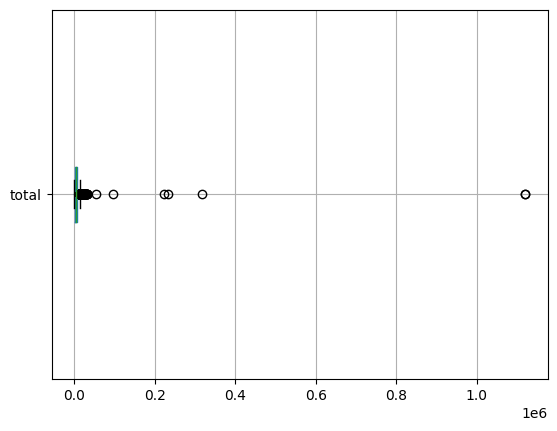

In [15]:
df[['total']].boxplot(vert=False)

12 - Existem candidados a outliers nesse dataset analisando a variável total? Explique

R: ***Responda aqui***

In [16]:
q3 = df['total'].quantile(0.75)
q1 = df['total'].quantile(0.25)
iqr = q3 - q1

iqr

4706.25

13 - Crie o limite inferior e superior utilizando a técnica do intervalo interquatil, tendo como base a variável total.

In [17]:
limite_superior = q3 + (1.5 * iqr)
limite_inferior = q1 - (1.5 * iqr)

14 - Crie um novo dataset chamado df_sem_outliers utilizando realizando o filtro de limite inferior e limite superior.

In [18]:
df_sem_outliers = df[
    (df['total'] >= limite_inferior) &
    (df['total'] <= limite_superior)
].copy()

df_sem_outliers.head()

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


15 - Utilizando o dataset sem outliers, crie um histograma com o agrupamento de 50 bins para avaliarmos a distribuição da nossa variável total.

<Axes: >

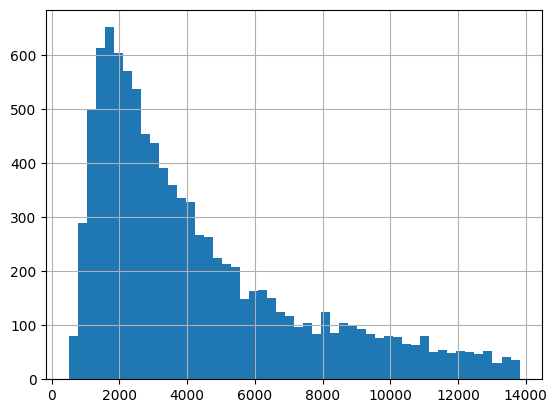

In [19]:
df_sem_outliers['total'].hist(bins=50)

16 - Utilizando o dataset sem outliers, crie um boxplot para avaliarmos nossas métricas estatísticas.

<Axes: >

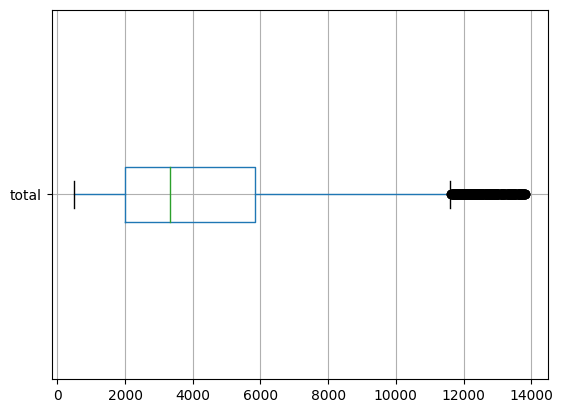

In [20]:
df_sem_outliers[['total']].boxplot(vert=False)

## Medidas de Tendência Central - *(Peso: 3)*

17 - Faça um análise de antes e depois com a função que apresenta o std(desvio padrão), média, mediana, q1, q2, q3, min e max do dataset com outliers e sem outliers.

In [21]:
media = df['total'].mean()
mediana = df['total'].median()
q1 = df['total'].quantile(0.25)
q2 = df['total'].quantile(0.5)
q3 = df['total'].quantile(0.75)

media, mediana, q1, q2, q3

(5490.4869996258885, 3581.5, 2061.75, 3581.5, 6768.0)

In [22]:
media = df_sem_outliers['total'].mean()
mediana = df_sem_outliers['total'].median()
q1 = df_sem_outliers['total'].quantile(0.25)
q2 = df_sem_outliers['total'].quantile(0.5)
q3 = df_sem_outliers['total'].quantile(0.75)

media, mediana, q1, q2, q3

(4340.06479070699, 3330.0, 1990.0, 3330.0, 5845.75)

18 - Com o dataset que você considera o melhor para avaliar as medidas de tendência central, apresente:

Média:

In [23]:
df_sem_outliers['total'].mean()

4340.06479070699

Mediana:

In [24]:
df_sem_outliers['total'].median()

3330.0

Moda

In [25]:
df_sem_outliers['total'].mode()

,total
0,2555


19 - Justifique a escolha do dataset para apresentar as medidas de tendência central.

R: A escolha deste dataset é justificada pela ausência de outliers, o que diminui a chance de variações extremas e imprecisas nos dados. Isso torna as medidas de tendência central mais consistentes e confiáveis, representando com maior precisão o comportamento geral do conjunto de dados.